# How to compare relative dose profile?

In [17]:
from Dosepy.image import load_multiples
from Dosepy.calibration import LUT
from Dosepy.tiff2dose import Tiff2DoseM

import numpy as np
import matplotlib.pyplot as plt

In [3]:
files = [
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_001.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_002.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/6NOV24_CAL/CAL20241106_003.tif",
]

img_m = load_multiples(files)

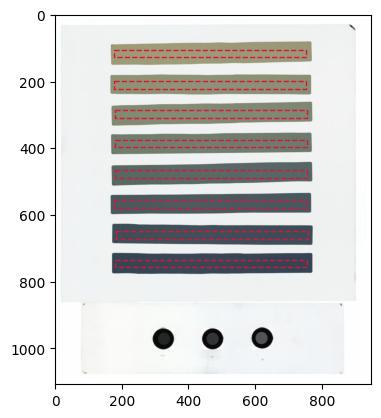

In [33]:
cal = LUT(img_m)

cal.set_central_rois(size = (195, 8))

cal.plot_rois()

cal.set_doses([0, 0.5, 1, 2, 4, 6, 8, 10])

cal.set_beam_profile("/media/luis/TOMO/Tiff Films/BeamProfile.csv")

cal.compute_lateral_lut(filter = 5)

In [7]:
# Load the images with the beam profile

files = [
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_001.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_002.tif",
    "/media/luis/TOMO/Tiff Films/EBT4/Verif 15x15/Ver_050dpi20241106_003.tif",
]

profile_image = load_multiples(files)

In [34]:
t2d = Tiff2DoseM()

dose = t2d.get_dose(
    img=profile_image,
    format="GP",
    lut=cal,
)

/home/luis/miniconda3/envs/dp/lib/python3.11/site-packages/Dosepy/tools/functions.py:19: RuntimeWarning: invalid value encountered in power
  return a*x + b*x**n


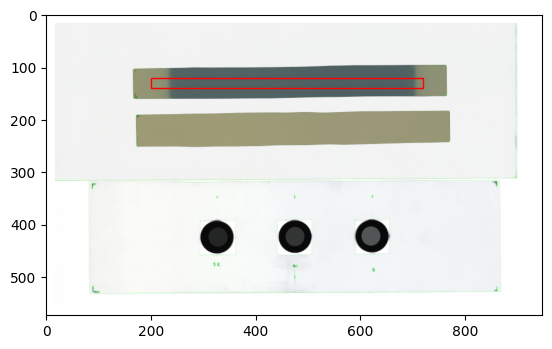

In [39]:
profile = np.mean(dose.array[120:140, 200:720], axis=0)

roi = plt.Rectangle((200, 120), 520, 20, fill=False, color="red")

fig, ax = plt.subplots()

ax.imshow(profile_image.array/np.amax(profile_image.array))
ax.add_patch(roi)

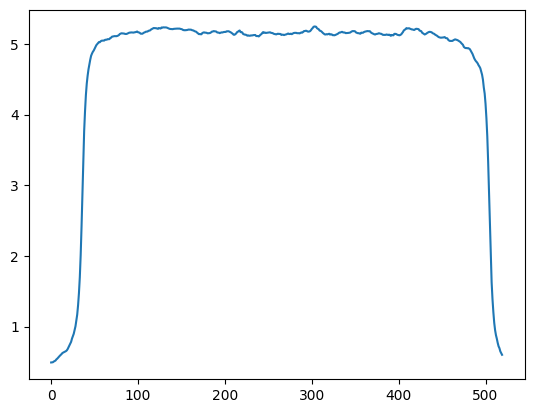

In [42]:
fig, ax = plt.subplots()

ax.plot(profile)

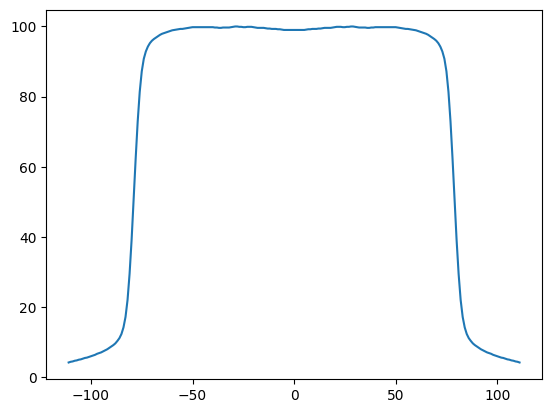

In [49]:
from relative_dose_1d.tools import get_data

# Beam profile exported from Eclipse v16
path_measured_profile = "/media/luis/TOMO/Tiff Films/Measured_6X_Profile_150x150_50mm.data"

measured_profile = get_data(path_measured_profile)

plt.plot(measured_profile[:,0], measured_profile[:,1])


## TODO 

Dose array should have a reference position